In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import SparsePCA
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'pandas'

# PREGUNTA 1

In [36]:
accidentes_df = pd.read_csv("/content/accidentsFull.csv")

accidentes_sub = accidentes_df[["WEATHER_R", "TRAF_CON_R"]].head(12).dropna() # 12 primeros registros
print(accidentes_sub)

    WEATHER_R  TRAF_CON_R
0           1           0
1           2           0
2           2           1
3           1           1
4           1           0
5           2           0
6           2           0
7           1           0
8           2           0
9           2           0
10          2           0
11          1           2


## PREGUNTA 1.1

In [67]:
# Sparse PCA
spca = SparsePCA(n_components=2, random_state=0, alpha=1e-3, ridge_alpha=1e-6)
spca_scores = spca.fit_transform(accidentes_sub)

In [68]:
# DataFrame con scores
scores_df = pd.DataFrame(spca_scores, columns=["PC1", "PC2"])

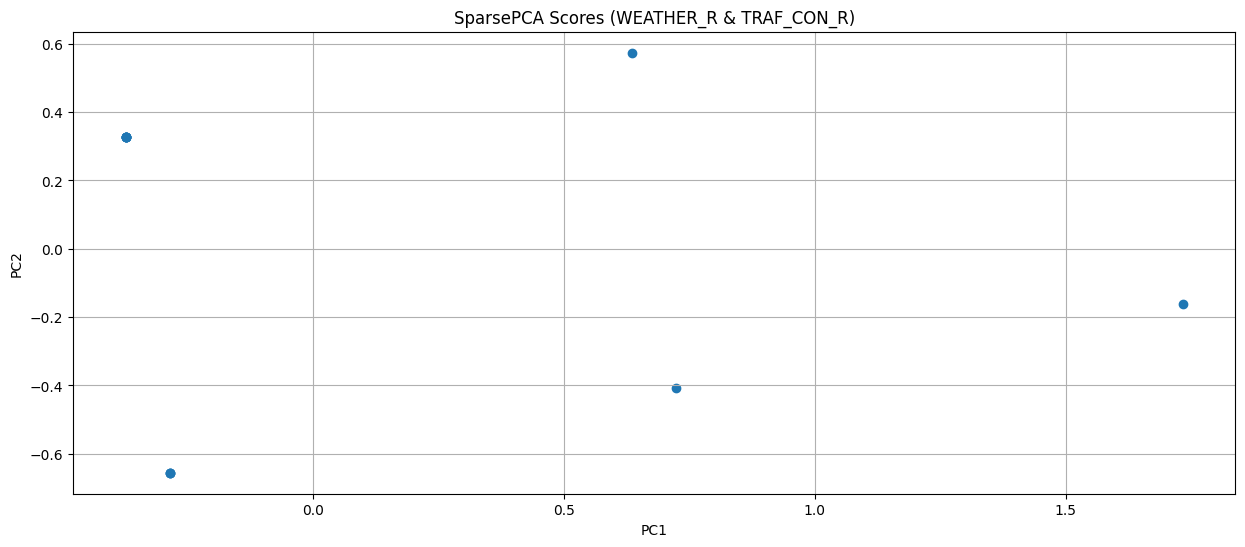

In [69]:
# Gráfico de scores
plt.figure(figsize=(15, 6))
plt.scatter(scores_df["PC1"], scores_df["PC2"])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("SparsePCA Scores (WEATHER_R & TRAF_CON_R)")
plt.grid(True)
plt.show()

## Respuesta 1.1
### Se han seleccionado los 12 primeros registros y se estan usando las columnas WEATHER_R y TRAF_CON_R.
Sabemos que este metodo (SparsePCA) intentan encontrar combinaciones dispersas de variables originales para construir componentes principales y esta es una pisble razón por la que aparecen solo 5 registros y no 12,  ya que tenemos para este caso pares de valores repitiendose como:
$$
ID  \quad\quad WEATHER\_R \quad\quad TRAF\_CON\_R\\
0 \quad\quad\quad\quad\quad\quad\quad\quad 1 \quad\quad\quad\quad\quad\quad\quad\quad 0\\
1 \quad\quad\quad\quad\quad\quad\quad\quad 2 \quad\quad\quad\quad\quad\quad\quad\quad 0\\
7 \quad\quad\quad\quad\quad\quad\quad\quad 1 \quad\quad\quad\quad\quad\quad\quad\quad 0\\
8 \quad\quad\quad\quad\quad\quad\quad\quad 2 \quad\quad\quad\quad\quad\quad\quad\quad 0\\
$$
Entonces, aunque seleccione 12 filas, solo 5 son utilizables porque hay valores repitiendose.
Solo tenemos 5 observaciones válidas, el gráfico puede mostrar poca dispersión y no es suficiente para inferir patrones.

## PREGUNTA 1.2

In [37]:
predictoras = accidentes_df.select_dtypes(include=[np.number]).dropna()

In [15]:
# Sparse PCA con más componentes
spca_full = SparsePCA(n_components=3, random_state=0, alpha=1e-3, ridge_alpha=1e-6)
scores_full = spca_full.fit_transform(predictoras)

In [66]:
# Scores con columna de tipo de lesión
lesion_labels = accidentes_df.loc[predictoras.index, "MAX_SEV_IR"]
scores_full_df = pd.DataFrame(scores_full, columns=["PC1", "PC2", "PC3"])
scores_full_df["Lesion"] = lesion_labels.values

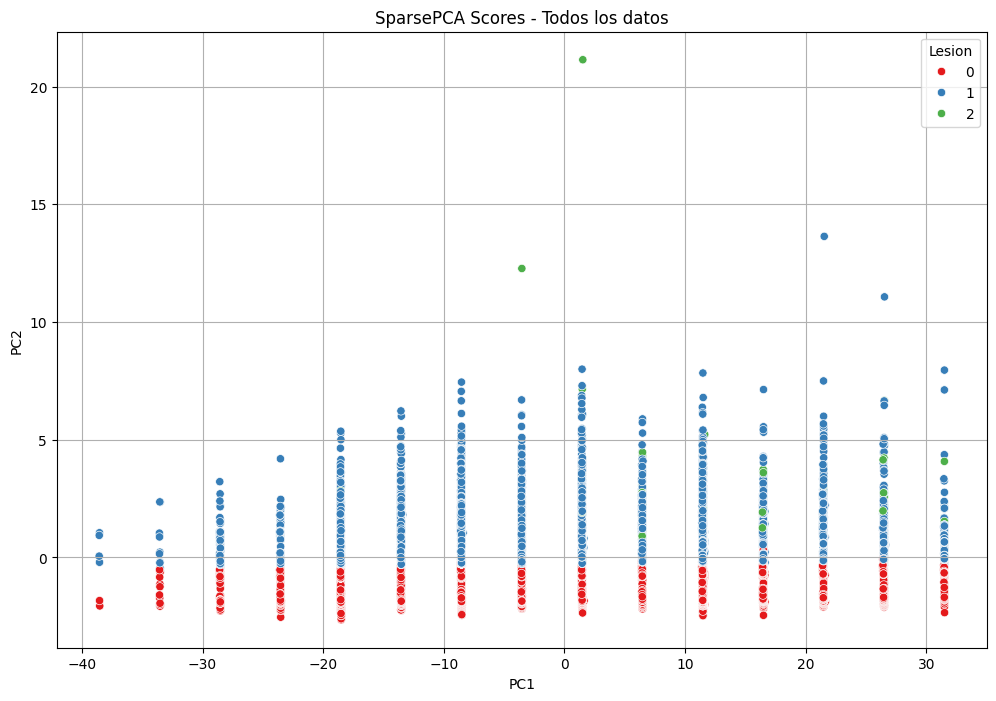

In [40]:
# Gráfico 2D de scores coloreado por tipo de lesión
plt.figure(figsize=(12, 8))
sns.scatterplot(data=scores_full_df, x="PC1", y="PC2", hue="Lesion", palette="Set1")
plt.title("SparsePCA Scores - Todos los datos")
plt.grid(True)
plt.show()

Se tienen muchos registros, por lo que los scores se distribuirán de manera más estructurada.<br>
Los primeros componentes tienden a capturar la variabilidad asociada a las condiciones del accidente.<br>
Los casos NO INJURY se agrupan en una zona de los componentes principales.<br>
Los casos con FATALITY podrían aparecer más alejados, mostrando que ciertas combinaciones de condiciones explican la severidad.<br>
Los INJURY se distribuyen en una zona intermedia.


# PREGUNTA 2

In [49]:
bostonHousing_df = pd.read_csv("/content/bostonHousing.csv")

print(bostonHousing_df)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO  LSTAT  MEDV  CAT. MEDV  
0       15.3   4.98  24.0          0  
1       17.8   9.14  21.6          0  
2     

## Respuesta 2.1
### Para evaluar la capacidad de generalización del modelo
Si ajustamos y evaluamos con el mismo conjunto, el error sería optimista porque el modelo ya “vio” esos datos.
Por eso separamos en:<br>
Conjunto de entrenamiento (train_X, train_y): usado para ajustar el modelo.<br>
Conjunto de validación (valid_X, valid_y): usado para evaluar el desempeño en datos nuevos.<br>
En el código de ejemplo, esto se hace con:

> train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)


## Respuesta 2.2
### Siguiendo el esquema de ejemplo que se tiene (code_ARL__.txt), para BostonHousing sería:


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
predictors = ["CRIM", "CHAS", "RM"]
outcome = "MEDV"

X = bostonHousing_df[predictors]
y = bostonHousing_df[outcome]

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

bostonHousing_lm = LinearRegression()
bostonHousing_lm.fit(train_X, train_y)

print(pd.DataFrame({"Predictor": predictors, "coefficient": bostonHousing_lm.coef_}))
print("Intercept:", bostonHousing_lm.intercept_)


  Predictor  coefficient
0      CRIM    -0.240062
1      CHAS     3.266817
2        RM     8.325175
Intercept: -29.193467430606834


### la ecuación para predecir la median house price de los predictores en el modelo es:
$$
(MEDV) = \beta_{0} + \beta_{1}\cdot CRIM + \beta_{2}\cdot CHAS + \beta_{3}\cdot RM
$$

donde los β son los coeficientes que nos imprimime el código.
$$
Id \qquad\quad Predictor \qquad\quad coefficient\\
0 \quad\qquad CRIM \qquad\qquad -0.240062\\
1 \quad\qquad CHAS \qquad\qquad\quad 3.266817\\
2 \qquad\qquad RM \qquad\qquad\quad 8.325175
$$



## Respuesta 2.3

In [57]:
nuevo_tramo = pd.DataFrame({"CRIM": [0.1], "CHAS": [0], "RM": [6]})
prediccion = bostonHousing_lm.predict(nuevo_tramo)
print(prediccion)

[20.73357813]


### El median house price que nos pronostica es: [20.73357813]

## Respuesta 2.4

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[list(variables)], train_y)
    return model
def score_model(model, variables):
    pred_y = model.predict(train_X[list(variables)])
    # we negate as score is optimized to be as low as possible
    return -adjusted_r2_score(train_y, pred_y, model)
allVariables = train_X.columns
results = exhaustive_search(allVariables, train_model, score_model)
data = []
for result in results:
    model = result["model"]
    variables = list(result["variables"])
    AIC = AIC_score(train_y, model.predict(train_X[variables]), model)
    d = {"n": result["n"], "r2adj": -result["score"], "AIC": AIC}
    d.update({var: var in result['variables'] for var in allVariables})
    data.append(d)
pd.DataFrame(data, columns=('n', 'r2adj', 'AIC') + tuple(sorted(allVariables)))


,n,r2adj,AIC,CHAS,CRIM,RM
0,1,0.489063,1989.276491,False,False,True
1,2,0.542511,1956.788087,False,True,True
2,3,0.550707,1952.299510,True,True,True


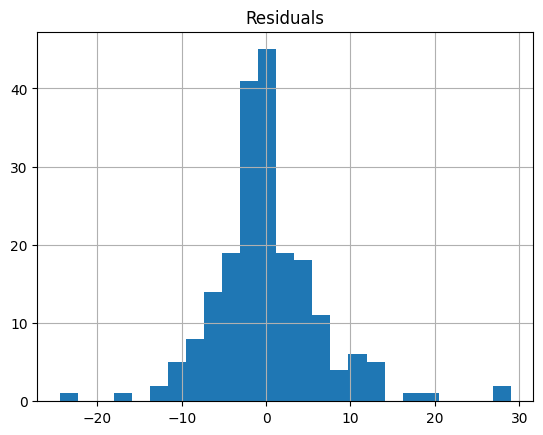

In [65]:
bostonHousing_lm_pred = bostonHousing_lm.predict(valid_X)
all_residuals = valid_y - bostonHousing_lm_pred
pd.DataFrame({"Residuals": all_residuals}).hist(bins=25)
plt.show()